In [157]:
import plotly.express as px
import numpy as np
import pandas as pd
data = pd.read_csv("C:/Users/kkeaa/Downloads/Project-main/Project-main/CENTEL_1522_years.csv")
dat = data['adj_close_price']
atr = data['atr']

In [158]:
def npmm_labeling(prices, n_period):
  labels = np.zeros(len(prices), dtype=np.int8)
  for i in range(n_period, len(prices)):
    window = prices[i - n_period:i]
    min_idx = np.argmin(window)
    max_idx = np.argmax(window)
    labels[i+max_idx-21] = -1
    labels[i+min_idx-21] = 1
  return labels

In [159]:
label = npmm_labeling(data['adj_close_price'],21)
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [160]:
unique_values, counts = np.unique(label, return_counts=True)

# Print counts for each value:
for value, count in zip(unique_values, counts):
    print(f'{value} :{count}')

-1 :290
0 :580
1 :260


In [161]:
#divide data to 4:1
import math
num = math.ceil(len(label)/5)
stock = data['adj_close_price'][-num:]
stock = stock.reset_index(drop=True)

In [162]:
#def calculate(prc,lst,ren,pred,stk,budget):
#    for i in range(ren):
#            if pred[i] == 1 :
#                stk += 1
#                prc.append((prc[i-1]+stock[i])*1.002)
#                lst.append((stk*stock[i]+budget)/prc[i]*100)
#            elif pred[i] == -1 :
#                if stk > 0 :
#                    stk -= 1
#                    prc.append(prc[i-1])
#                    budget += stock[i]*0.998
#                    lst.append((stk*stock[i]+budget)/prc[i]*100)
#                else :
#                    prc.append(prc[i-1])
#                    if prc[i] <= 0 :
#                        lst.append(lst[i-1])
#                    else :
#                        lst.append(budget/prc[i]*100)
#            elif pred[i] == 0 :
#                prc.append(prc[i-1])
#                if prc[i] != 0 :
#                    lst.append((stk*stock[i]+budget)/prc[i]*100)
#                else:
#                    lst.append(lst[i-1])
#    return prc,lst,budget

In [163]:
def calculate(prc,lst,ren,pred,stk,budget):
    buy = 0
    for i in range(ren):
            if stk > 0:
                if pred[i] == 1:
                    stk += 1
                    buy += stock[i]*1.002
                    prc.append(buy)
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
                elif pred[i] == -1 :
                    stk -= 1
                    prc.append(prc[i-1])
                    budget += stock[i]*0.998
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
                elif pred[i] == 0 :
                    prc.append(prc[i-1])
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
            elif stk == 0:
                if pred[i] == 1:
                    stk += 1
                    buy += stock[i]*1.002
                    prc.append(buy)
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
                elif pred[i] == -1 :
                    stk -= 1
                    prc.append(buy-stock[i]*stk)
                    budget += stock[i]*0.998
                    lst.append((budget)/prc[i]*100)
                elif pred[i] == 0 :
                    prc.append(buy)
                    if prc[i] != 0 :
                        lst.append(budget/prc[i]*100)
                    else:
                        lst.append(0)
            elif stk < 0:
                if pred[i] == 1:
                    stk += 1
                    buy += stock[i]*1.002
                    prc.append(buy-stk*stock[i])
                    lst.append(budget/prc[i]*100)
                elif pred[i] == -1:
                    stk -= 1
                    prc.append(buy-stock[i]*stk)
                    budget += stock[i]*0.998
                    lst.append((budget)/prc[i]*100)
                elif pred[i] == 0 :
                    prc.append(buy-stk*stock[i])
                    lst.append((budget)/prc[i]*100)
    return prc,lst,budget

In [164]:
signal = ['volume_prof_signal','stoch_signal_2','bb_signal','cci_signal','bb_rsi_signal','renko_adx_signal','ma50_100_signal','rsiandmacd','fake_obv_macd_crossover_signal','wpr_signal','renko_adx_signal','wpr_signal','adx_signal','rsi_adx_signal','ma30_200_signal','psar_adx_signal']
#,'renko_adx_signal','wpr_signal','adx_signal','rsi_adx_signal','ma30_200_signal','psar_adx_signal'

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[signal], label, test_size=0.2, random_state=0)

In [166]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE()
#X_train, y_train = sm.fit_resample(X_train_res, y_train_res)

In [167]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
svm_classifier = SVC(kernel='poly', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
svm_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy poly:{accuracy * 100:.2f}%")

Accuracy poly:53.98%


In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
lo_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, lo_pred)
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 57.08%


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(10):
    knn_classifier = KNeighborsClassifier(n_neighbors=6)

    # Train the classifier on the training set
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    knn_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5575221238938053


In [170]:
svm_prc , svm_lst,svm_d=bud = calculate([],[],num,svm_pred,0,0)
lo_prc , lo_lst,lo_bud = calculate([],[],num,lo_pred,0,0)
knn_prc , knn_lst , knn_bud = calculate([],[],num,knn_pred,0,0)

In [171]:
bh_lst = []
for i in range(num):
    bh_lst.append(stock[i]/stock[0]*100)

In [172]:
dat = dat[-num:]

In [173]:
signal = ['volume_prof_signal','stoch_signal_2','bb_signal','cci_signal','bb_rsi_signal','renko_adx_signal','ma50_100_signal','rsiandmacd','fake_obv_macd_crossover_signal','wpr_signal']
stock = data[signal]
stock = stock[-num:]
stock = stock.reset_index(drop=True)
we = [0.07766866, 0.11908021, 0.02256529, 0.03446324, 0.07361388,
       0.01545133, 0.15953431, 0.25574788, 0.11341415, 0.12846106]

de_pred = []
for i in range(len(stock)):
    td = 0
    for j in range(10):
        td += stock[signal[j]][i] * we[j]
    if(td > 0.2):
        de_pred.append(1)
    elif td < -0.2:
        de_pred.append(-1)
    else:
        de_pred.append(0)

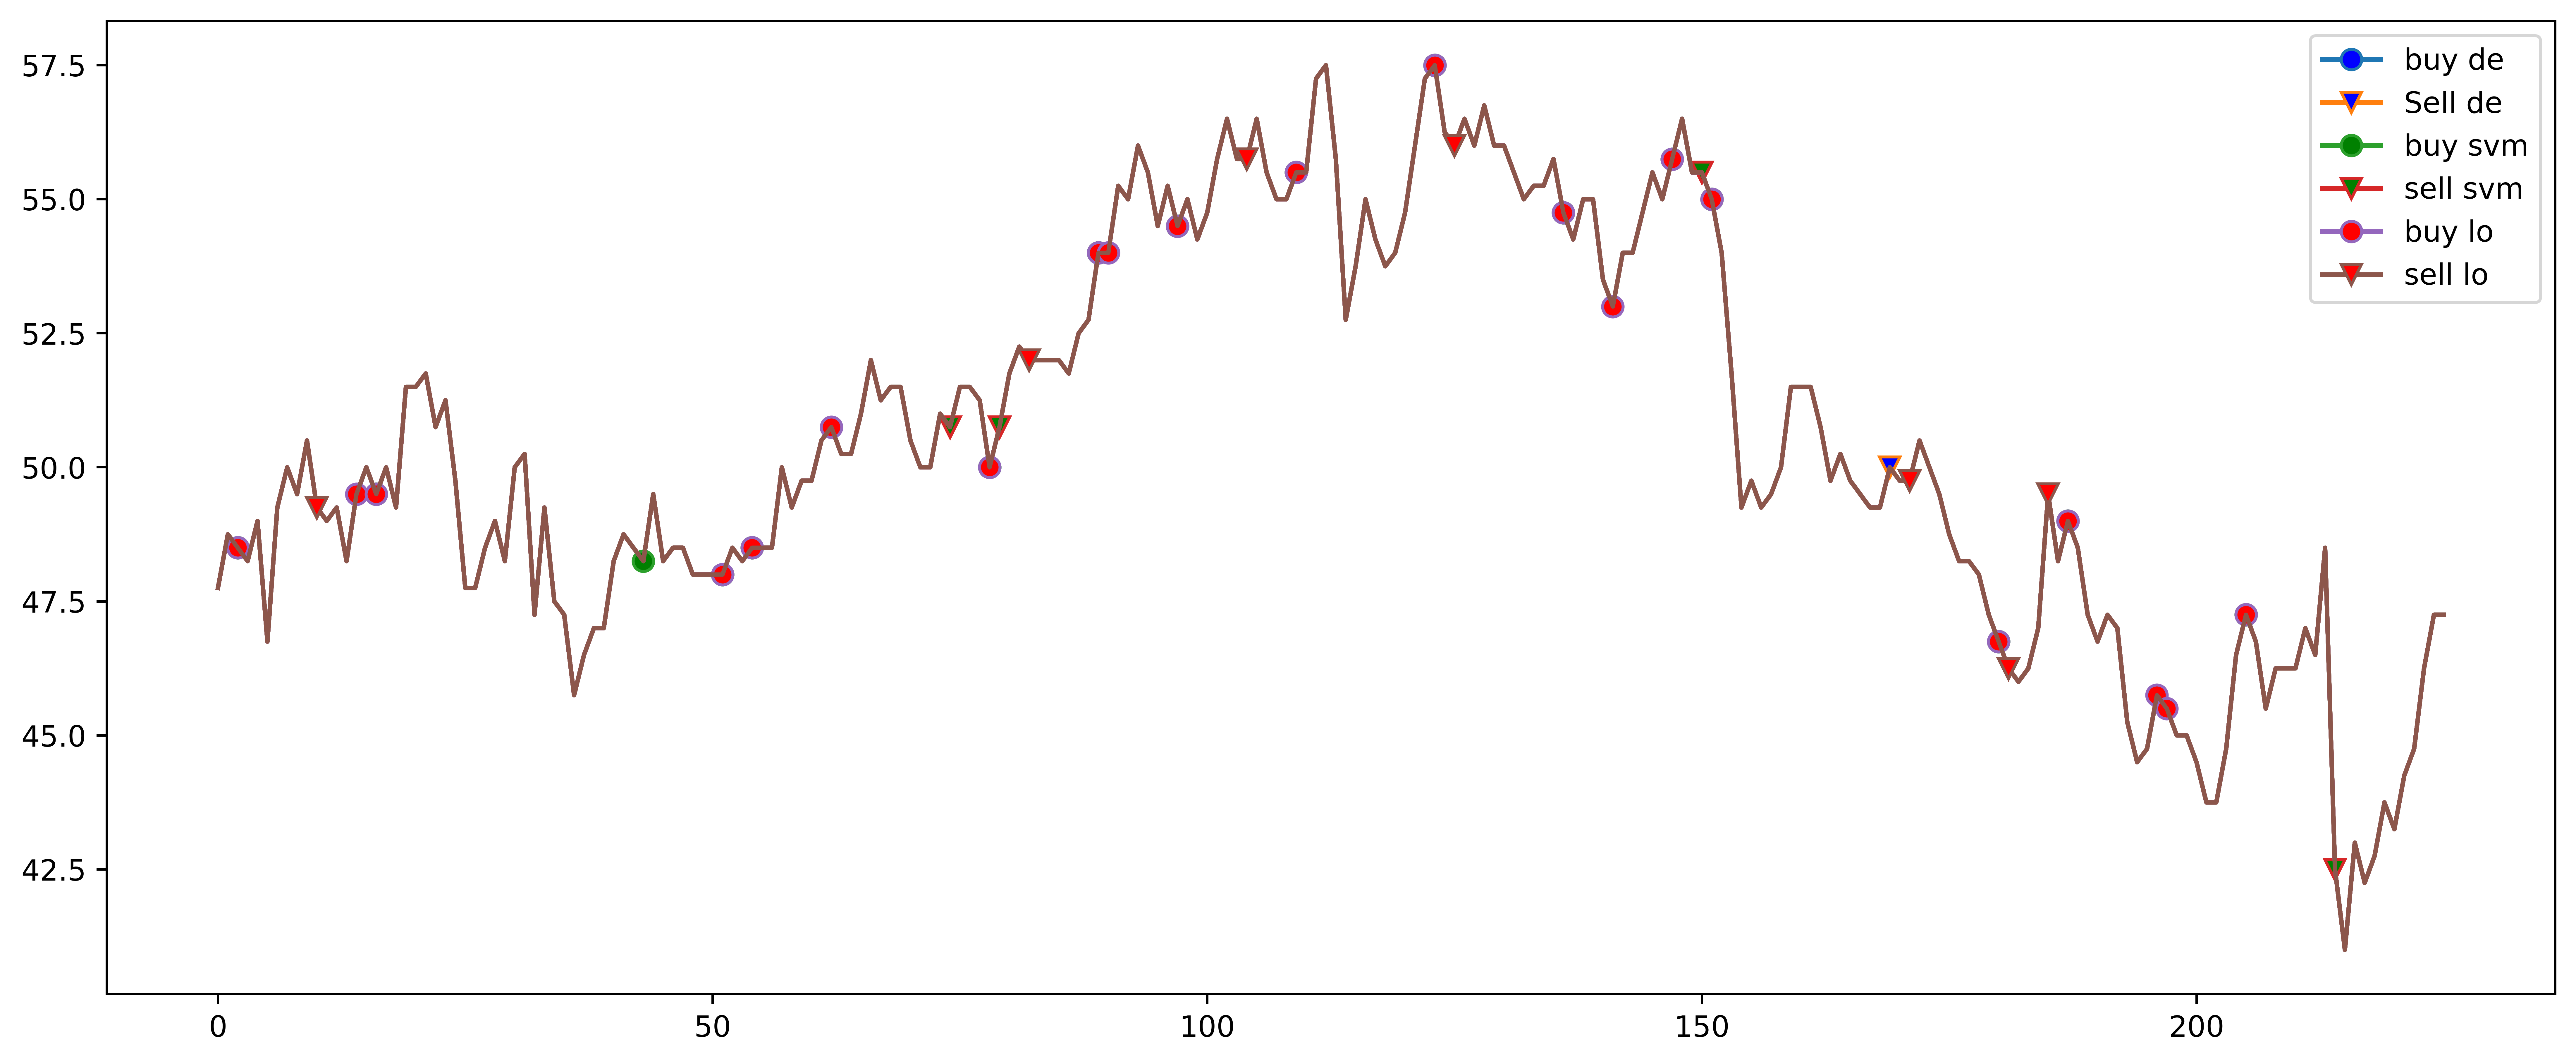

In [174]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
il = []
buy_svm,buy_lo,buy_de = [],[],[]
sell_svm,sell_lo,sell_de = [],[],[]
for idx,i in enumerate(de_pred):
    if i==1:
        buy_de.append(idx)
    if i==-1:
        sell_de.append(idx)
for idx,i in enumerate(svm_pred):
    if i==1:
        buy_svm.append(idx)
    if i==-1:
        sell_svm.append(idx)
for idx,i in enumerate(lo_pred):
    if i==1:
        buy_lo.append(idx)
    if i==-1:
        sell_lo.append(idx)
for i in range(len(knn_pred)):
    il.append(i)
figure(figsize=(15, 6), dpi=720)
plt.plot(il,dat,marker='o',
    markersize=7,markerfacecolor='b',markevery=buy_de)
plt.plot(il,dat,marker='v',
    markersize=7,markerfacecolor='b',markevery=sell_de)
plt.plot(il,dat,marker='o',
    markersize=7,markerfacecolor='g',markevery=buy_svm)
plt.plot(il,dat,marker='v',
    markersize=7,markerfacecolor='g',markevery=sell_svm)
plt.plot(il,dat,marker='o',
    markersize=7,markerfacecolor='r',markevery=buy_lo)
plt.plot(il,dat,marker='v',
    markersize=7,markerfacecolor='r',markevery=sell_lo)
plt.legend(['buy de', 'Sell de' , 'buy svm','sell svm' , 'buy lo', 'sell lo'])
plt.show()


In [175]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=[ 'SVM', 'LO', 'KNN'])

SVM = go.Scatter(y=svm_lst, mode='lines', name='SVM')
LO = go.Scatter(y=lo_lst, mode='lines', name='LO')
KNN = go.Scatter(y=knn_lst , mode='lines' , name='KNN')
BH = go.Scatter(y=bh_lst , mode='lines' , name='BH')

fig.add_trace(SVM, row=1, col=1)
fig.add_trace(LO, row=1 , col=2)
fig.add_trace(KNN, row=2 , col=1)
fig.add_trace(BH, row=2 , col=2)
#fig.update_yaxes(range=[75,150])

#fig.update_layout(title_text='Graph', showlegend=False)

#fig.show()

In [176]:
fig = go.Figure([SVM , LO , KNN , BH])
fig.show()

In [177]:
print(f'SVM Growth {svm_lst[-1]-100} %')
print(f'LOGISTIC Growth {lo_lst[-1]-100} %')
print(f'KNN Growth {knn_lst[-1]-100} %')
print(f'BH Growth {bh_lst[-1]-100} %')

SVM Growth -6.68186568218772 %
LOGISTIC Growth -5.1958524702691165 %
KNN Growth -0.6011892084324728 %
BH Growth -1.0471204188481664 %


In [178]:
buy_idx = []
sell_idx = []
for idx,i in enumerate(label[-num:]):
    if i==1:
        buy_idx.append(idx)
    if i==-1:
        sell_idx.append(idx)

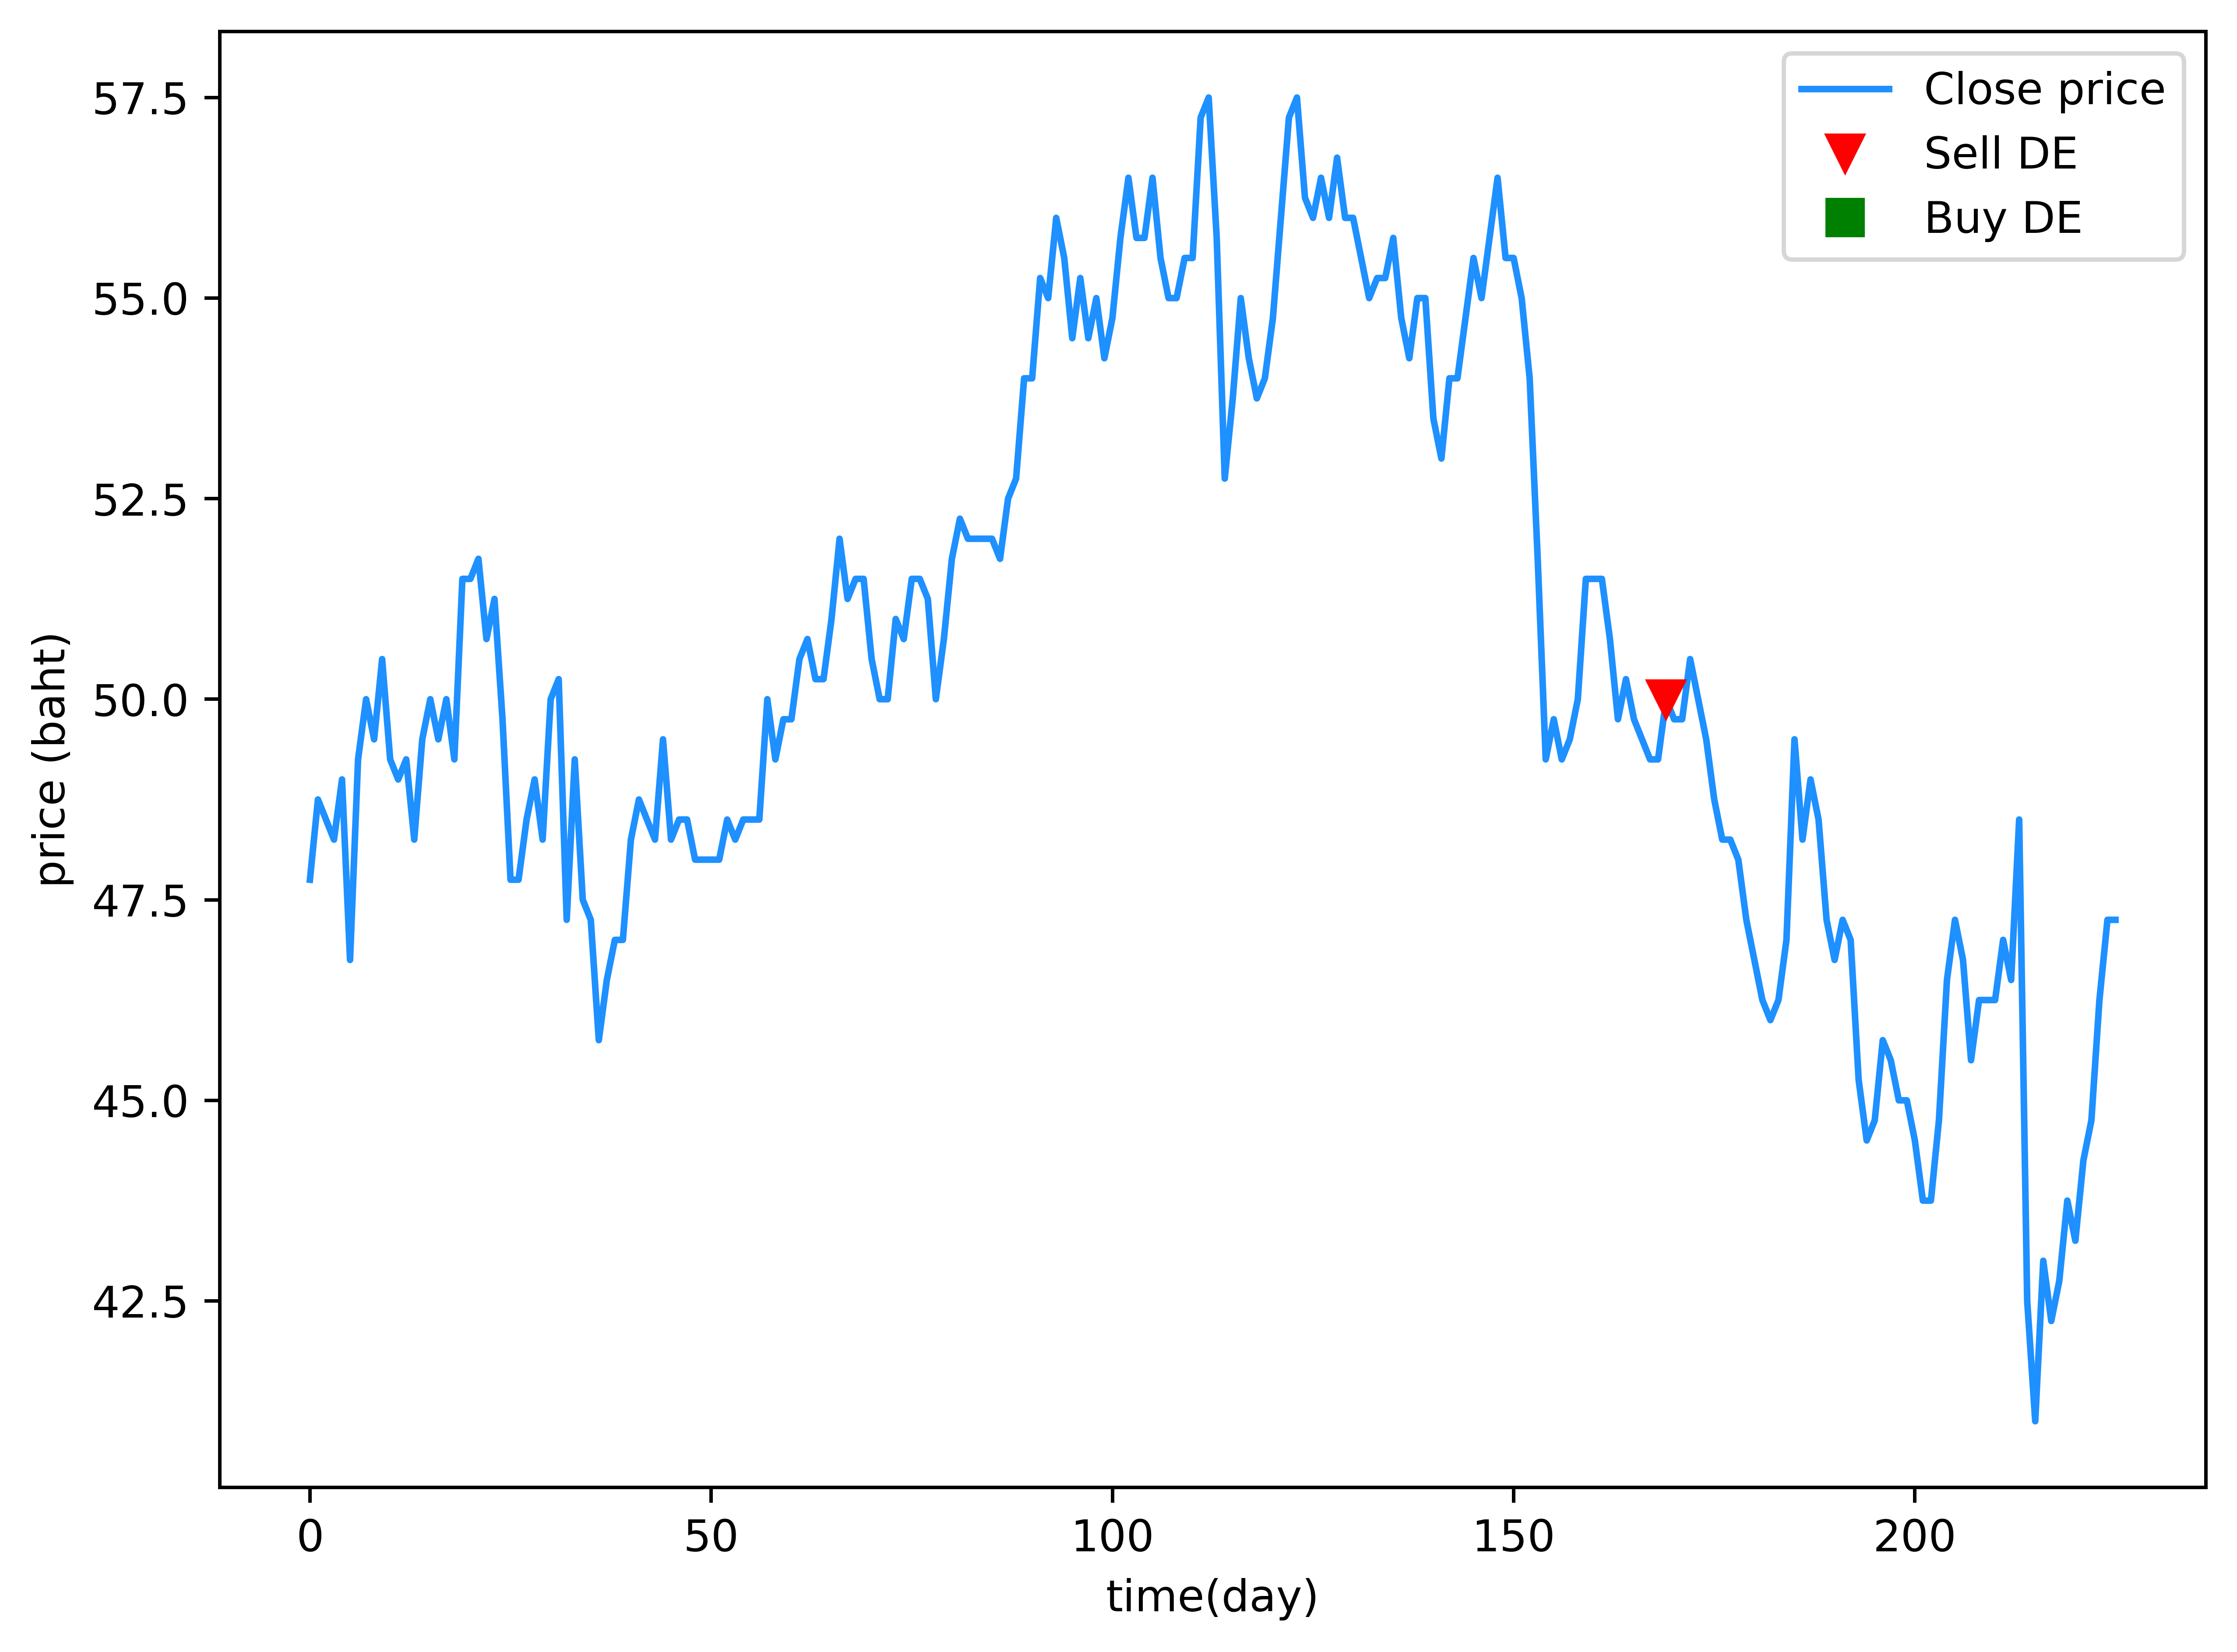

In [179]:
stock = dat
il = []
buy_idx = []
sell_idx = []
for idx,i in enumerate(de_pred):
    if i==1:
        buy_idx.append(idx)
    if i==-1:
        sell_idx.append(idx)
for i in range(len(de_pred)):
    il.append(i)
figure(figsize=(15, 6), dpi=720)
plt.plot(il,stock,color='dodgerblue')
plt.plot(il,stock,color='red',linestyle = '',marker='v',
    markersize=8,markerfacecolor='r',markevery=sell_idx)
plt.plot(il,stock,color='green', linestyle = '',marker='s',
    markersize=8,markerfacecolor='g',markevery=buy_idx)
plt.legend(['Close price','Sell DE', 'Buy DE'])
plt.xlabel('time(day)')
plt.ylabel('price (baht)')
plt.gca().set_aspect('10.0', adjustable='box')  # Set the aspect ratio to 'equal'
plt.show()

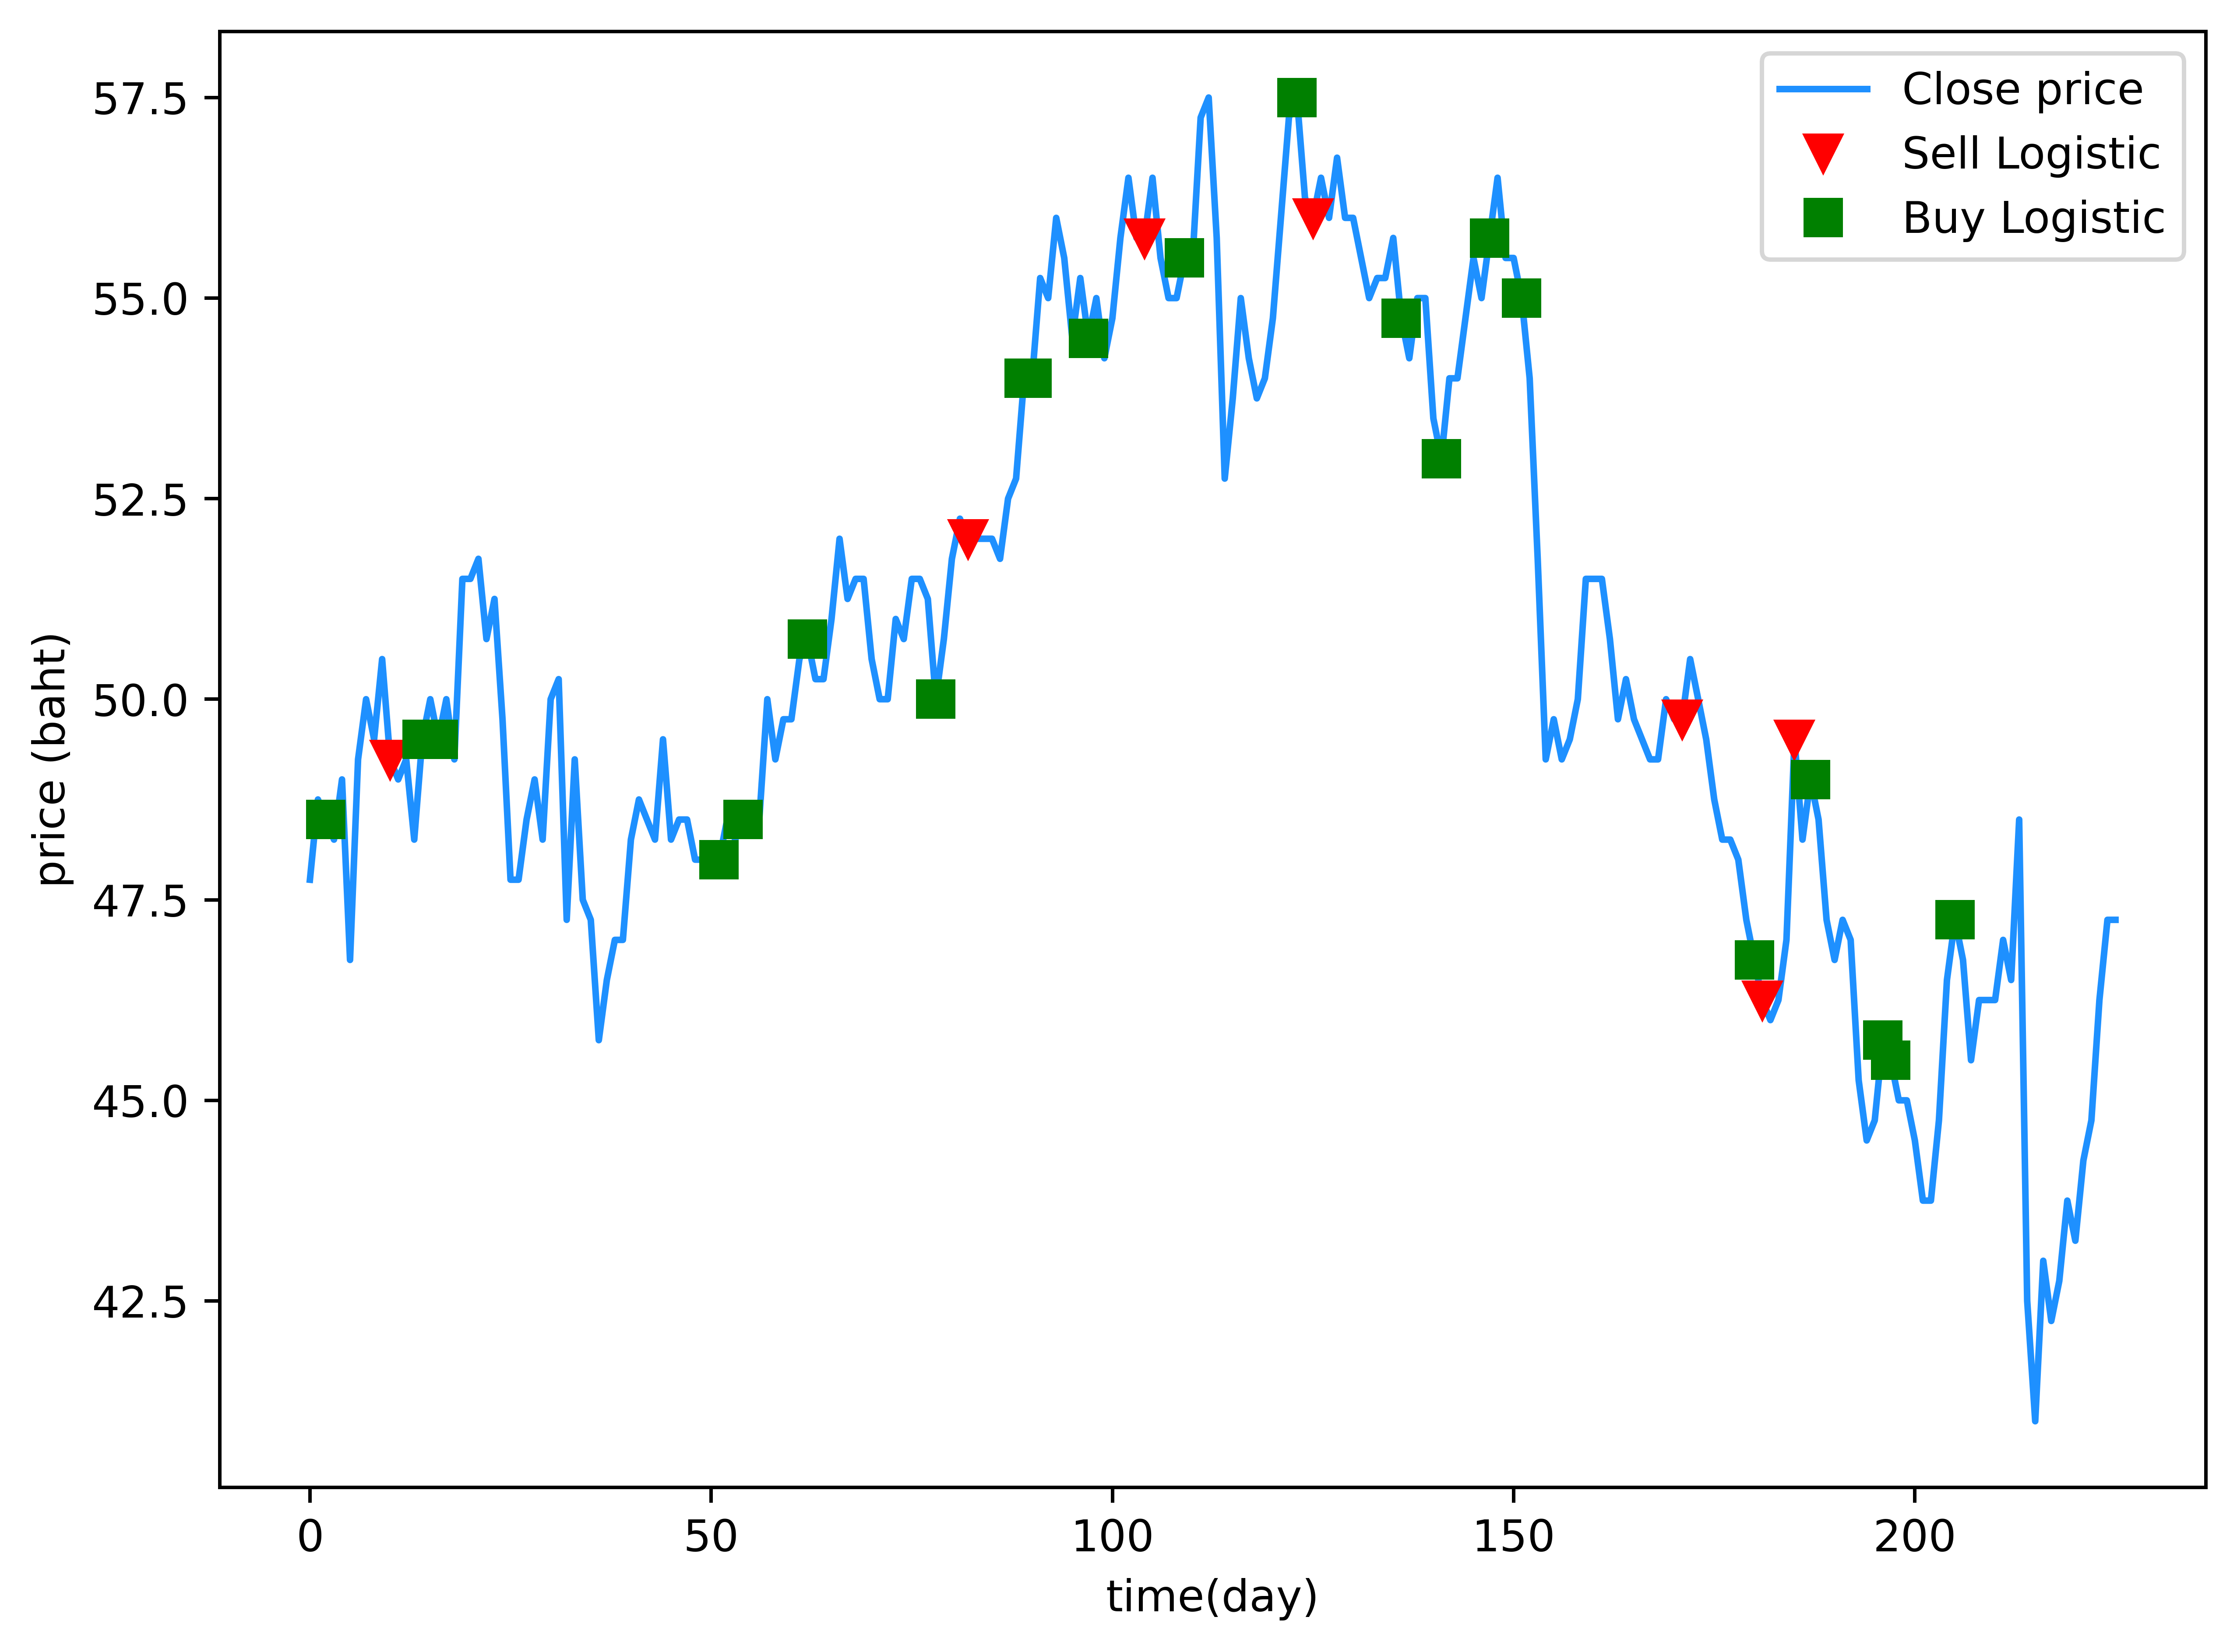

In [180]:
il = []
buy_idx = []
sell_idx = []
for idx,i in enumerate(lo_pred):
    if i==1:
        buy_idx.append(idx)
    if i==-1:
        sell_idx.append(idx)
for i in range(len(lo_pred)):
    il.append(i)
figure(figsize=(15, 6), dpi=720)
plt.plot(il,stock,color='dodgerblue')
plt.plot(il,stock,color='red',linestyle = '',marker='v',
    markersize=8,markerfacecolor='r',markevery=sell_idx)
plt.plot(il,stock,color='green', linestyle = '',marker='s',
    markersize=8,markerfacecolor='g',markevery=buy_idx)
plt.legend(['Close price','Sell Logistic', 'Buy Logistic'])
plt.xlabel('time(day)')
plt.ylabel('price (baht)')
plt.gca().set_aspect('10.0', adjustable='box')  # Set the aspect ratio to 'equal'
plt.show()

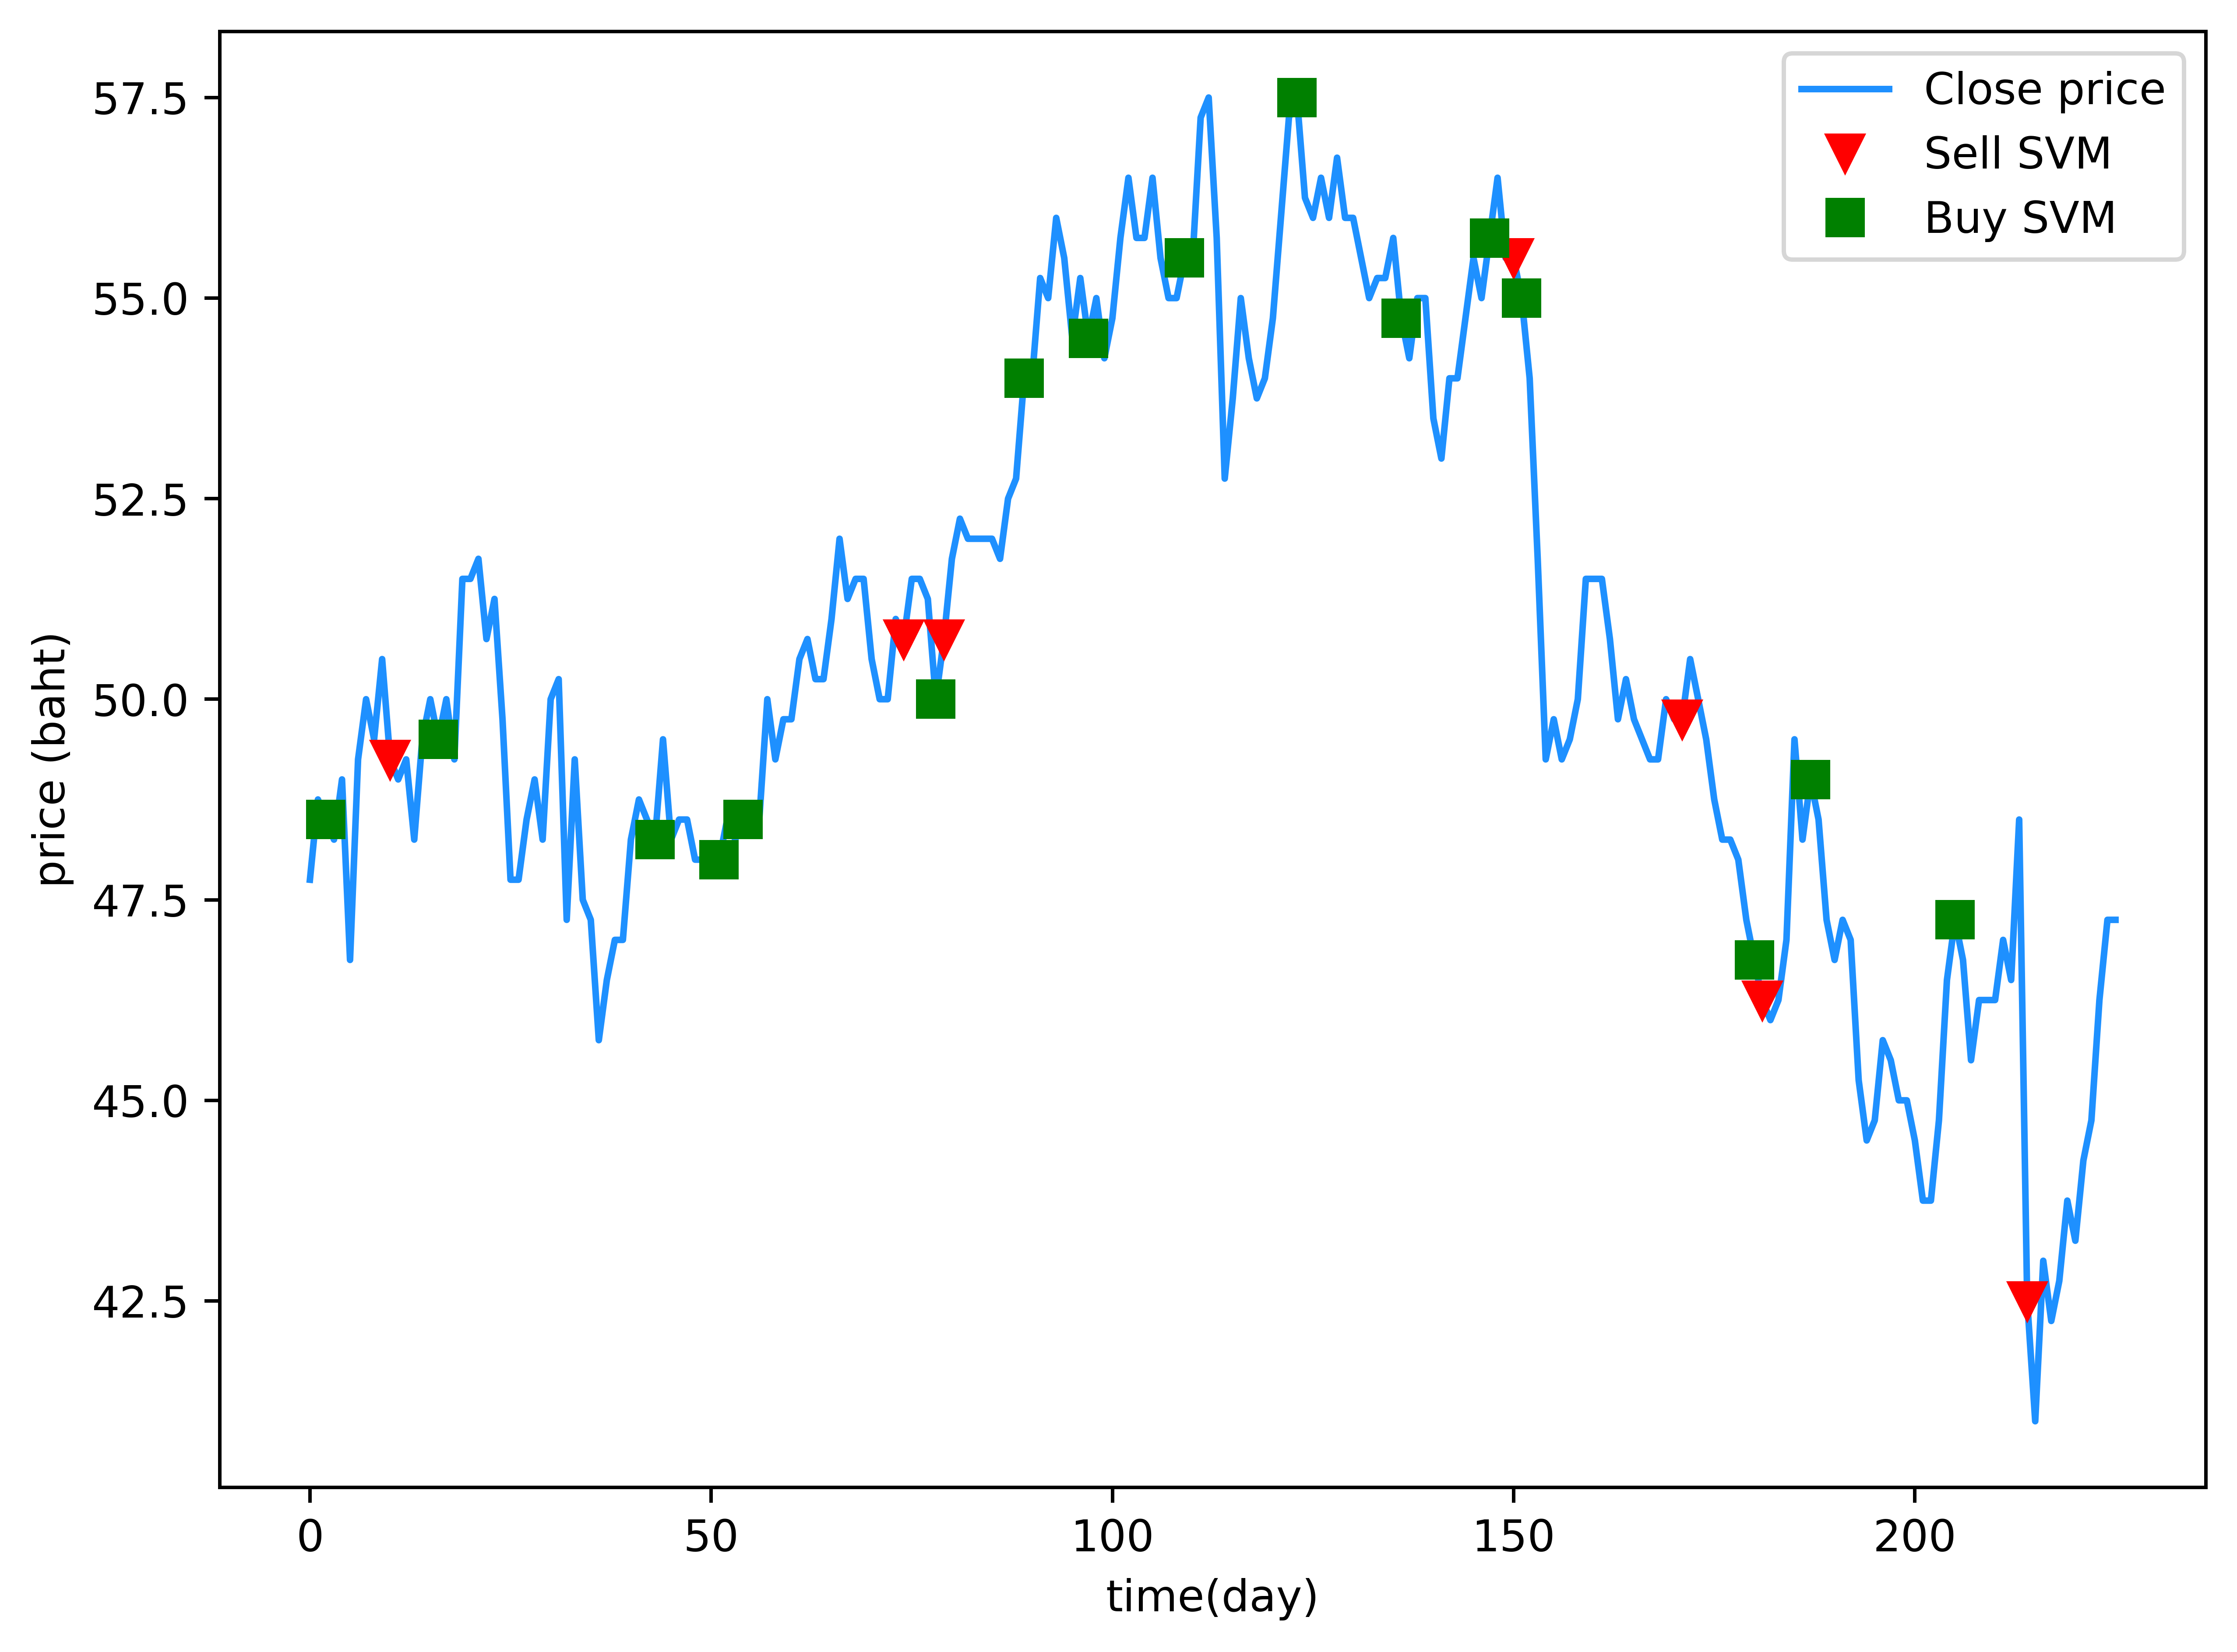

In [181]:
il = []
buy_idx = []
sell_idx = []
for idx,i in enumerate(svm_pred):
    if i==1:
        buy_idx.append(idx)
    if i==-1:
        sell_idx.append(idx)
for i in range(len(svm_pred)):
    il.append(i)
figure(figsize=(15, 6), dpi=720)
plt.plot(il,stock,color='dodgerblue')
plt.plot(il,stock,color='red',linestyle = '',marker='v',
    markersize=8,markerfacecolor='r',markevery=sell_idx)
plt.plot(il,stock,color='green', linestyle = '',marker='s',
    markersize=8,markerfacecolor='g',markevery=buy_idx)
plt.legend(['Close price','Sell SVM', 'Buy SVM'])
plt.xlabel('time(day)')
plt.ylabel('price (baht)')
plt.gca().set_aspect('10.0', adjustable='box')  # Set the aspect ratio to 'equal'
plt.show()

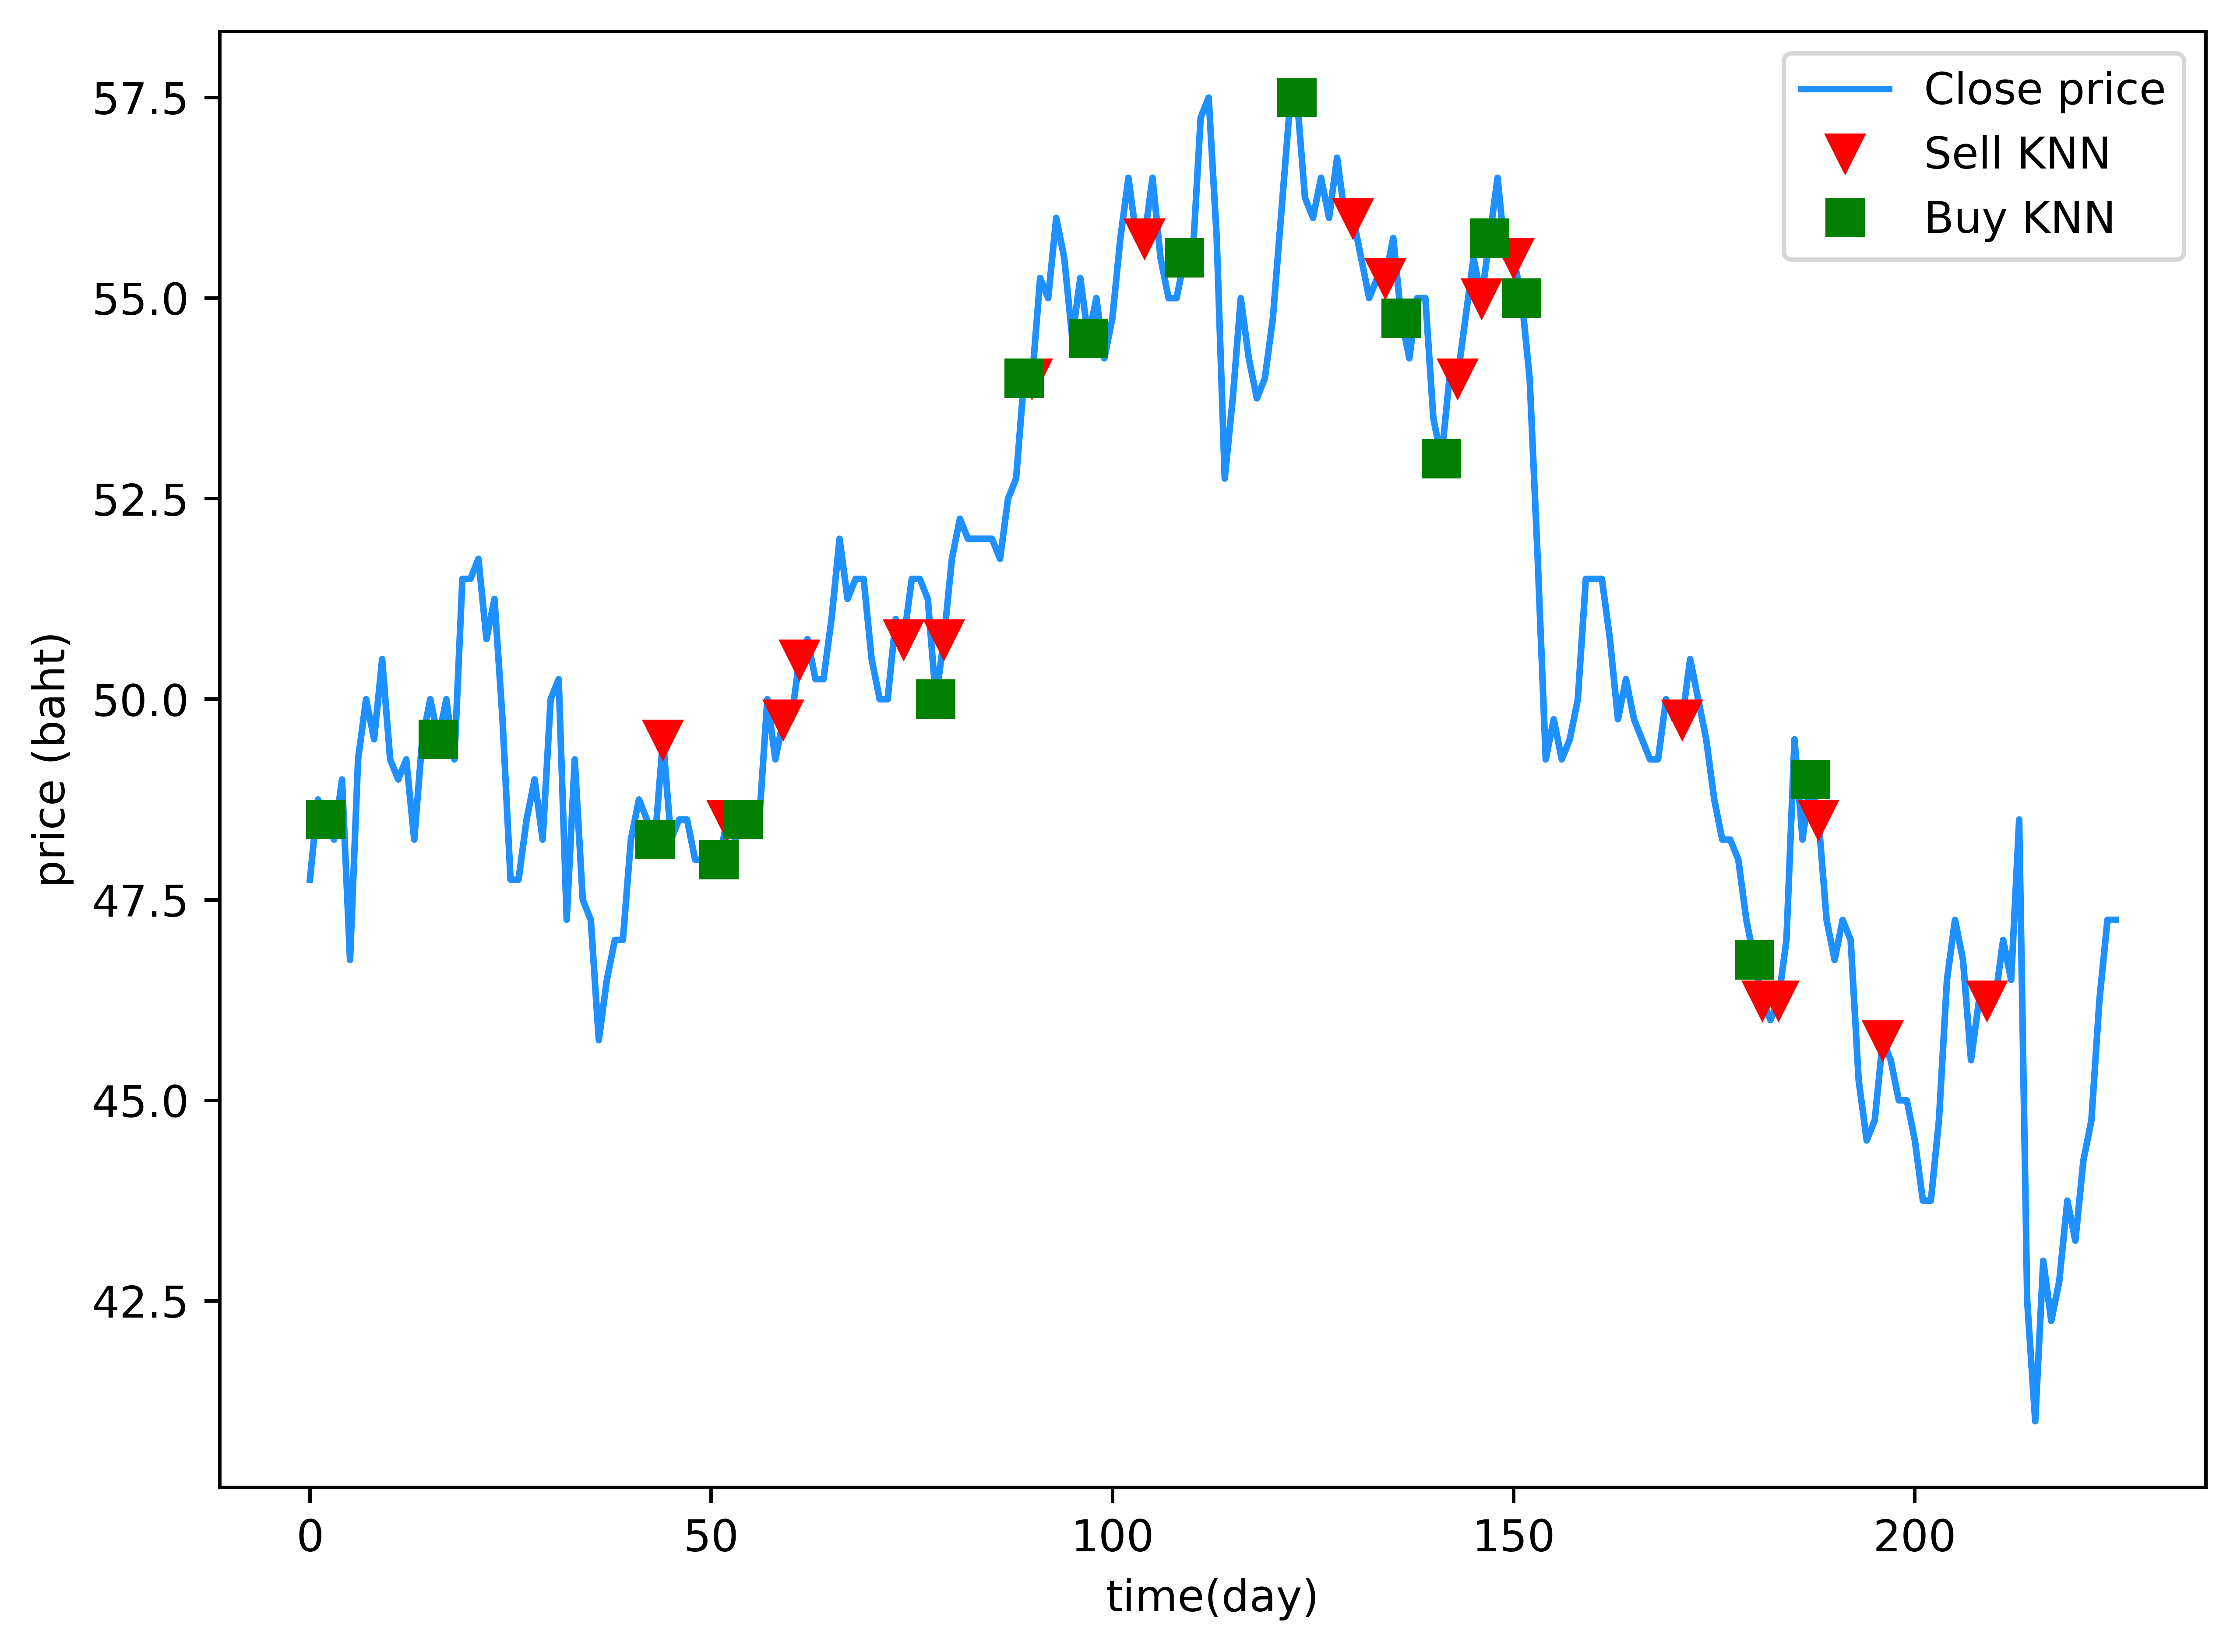

In [182]:
il = []
buy_idx = []
sell_idx = []
for idx,i in enumerate(knn_pred):
    if i==1:
        buy_idx.append(idx)
    if i==-1:
        sell_idx.append(idx)
for i in range(len(knn_pred)):
    il.append(i)
figure(figsize=(15, 6), dpi=720)
plt.plot(il,stock,color='dodgerblue')
plt.plot(il,stock,color='red',linestyle = '',marker='v',
    markersize=8,markerfacecolor='r',markevery=sell_idx)
plt.plot(il,stock,color='green', linestyle = '',marker='s',
    markersize=8,markerfacecolor='g',markevery=buy_idx)
plt.legend(['Close price','Sell KNN', 'Buy KNN'])
plt.xlabel('time(day)')
plt.ylabel('price (baht)')
plt.gca().set_aspect('10.0', adjustable='box')  # Set the aspect ratio to 'equal'
plt.show()